# 서울의 기온 데이터 분석

* https://data.kma.go.kr/stcs/grnd/grndTaList.do?pgmNo=70

* 기온분석>
    * 자료구분:일,
    * 자료형태:기본,
    * 기간: ~ 현재, 
    * 지역: 서울
* CSV 파일 형태로 다운

In [ ]:
# https://data.kma.go.kr/cmmn/main.do;
# 정부에서 공공 데이터 공개. 정보를 공평하게 접근하고 투명성을 높임
# 1) 해당기관에서 파일로 다운받아, 일반 사용자가 활용할 수 있다.
# 2) 오픈 API : 네트워크 상의 함수. 기상청 서버의 문에 네트워크 요청해서 해당 데이터를 받는 방식. 
# 서버의 문을 열고 들어가야하니 인증서를 발급받아서 URL에 탭재하면 서버를 통과하여 자료를 받을 수 있다.

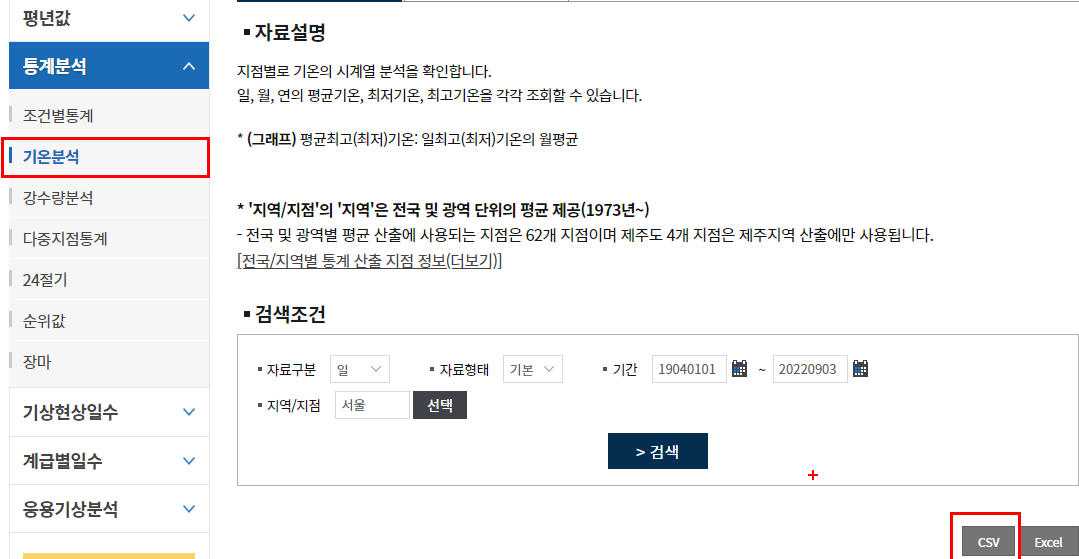

### 데이터에 대한 질문

* 서울이 가장 더웠던 날은 언제였을까? 얼마나 더웠을까?
* 일교차가 가장 큰 시기는 1년 중 언제쯤일까?
* 겨울에는 언제 가장 추울까? 12월? 1월? 2월?
* 가장 덥다고 알려진 대구보다 서울이 더 더운 날이 1년 중 얼마나 있을까?

## 라이브러리 로드

In [1]:
!pip install matplotlib

In [1]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# #코랩의 경우
# # 나눔고딕 폰트 인스톨
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

## 데이터 로드

In [7]:
# 데이터 로드, 인코딩, header,sep 등 필요한 파라미터 사용
df = pd.read_csv('./data/ta_20220920102413.csv')
df.head()
# 유니코드가 맞지 않아서 생긴 에러 

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 0: invalid start byte

In [43]:
# 데이터 로드, 인코딩, header,sep 등 필요한 파라미터 사용
df = pd.read_csv('./data/ta_20220920102413utf8.csv', header=7) # 불러들일 row 위치 지정
df.head()
# 메모장에서 다른 이름 저장 -> 모든파일, 인코딩: utf-8 했더니, 
# 위의 글이 파스에러를 일으켜서, 글을 제외하고 데이터만 가지고오기위해 row지정.

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


In [11]:
# 데이터 로드, 인코딩, header,sep 등 필요한 파라미터 사용
df = pd.read_csv('./data/ta_20220920102413utf.csv') 
df.head(8)
# 엑셀에서 다른 이름으로 저장 -> utf-8로 저장

,기온분석,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,[검색조건],NaN,NaN,NaN,NaN
1,자료구분 : 일,NaN,NaN,NaN,NaN
2,자료형태 : 기본,NaN,NaN,NaN,NaN
3,지역/지점 : 서울,NaN,NaN,NaN,NaN
4,기간 : 19040101~20220919,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
7,1907-10-01,108,13.5,7.9,20.7


In [13]:
# 데이터 로드, 인코딩, header,sep 등 필요한 파라미터 사용
df = pd.read_csv('./data/ta_20220920102413utf.csv', header=7) # 불러들일 row 위치 지정 => 불필요한 자료는 제거
df.head()
# 엑셀에서 다른 이름으로 저장 -> utf-8로 저장

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


> * 인코딩 에러 -> 편집기에서 인코딩(utf-8)로 명시적으로 지정 후, 저장해서 다시 판다스로 로드
> * Parse 에러 (메모장에서 저장 시) -> 데이터 윗부분의 텍스트를 로드할 때 해석하지 못하는 문자열이 있어서 에러 발생 -> header옵션으로 읽어들일 row위치 지정
> * UTF-8로 변환시 사용했던 편집기에 따라 상이한 결과 -> header 숫자를 적절하게 조정

> * 보통 한글에서 사용하는 인코딩 종류(utf-8, euc-kr, cp949, utf-8-sig)

In [16]:
# 데이터 로드, 인코딩, header,sep 등 필요한 파라미터 사용
# df = pd.read_csv('./data/ta_20220920102413utf.csv', header=7, encoding='utf-8') # defalut : utf-8 (저장시 인코딩)
df = pd.read_csv('./data/ta_20220920102413utf.csv', header=7, encoding='euc-kr') # 다른 인코딩을 지정하면 에러발생 
df.head()

UnicodeDecodeError: 'euc_kr' codec can't decode byte 0xec in position 6: illegal multibyte sequence

## 데이터 살펴보기

* 데이터 사이즈 (행수, 컬럼수)
* 컬럼 이름과 타입
* 결측치 유무
* 통계 정보

In [17]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41562 entries, 0 to 41561
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       41562 non-null  object 
 1   지점       41562 non-null  int64  
 2   평균기온(℃)  40806 non-null  float64
 3   최저기온(℃)  40803 non-null  float64
 4   최고기온(℃)  40803 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ MB


> * 데이터 수 : 41562건
> * 컬럼 수와 이름 : 5개. 날짜, 지점, 평균기온, 최저기온, 최고기온
> * 컬럼 타입 : 날짜 -> str(나중에 type을 바꾸어야할지. 사용방식에 따라 고민해야할 지점), 기온 : 실수
> * 결측치 유무 : 날짜,지점은 결측치x. 기온 컬럼에 대해서는 결측치 존재. -> 어떻게 처리할지 파악


In [18]:
# 통계 정보 기술 : 숫자형 컬럼에만 국한
df.describe()

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
count,41562.0,40806.000000,40803.000000,40803.000000
mean,108.0,11.781135,7.490523,16.784746
std,0.0,10.662868,10.891121,10.980128
min,108.0,-19.200000,-23.100000,-16.300000
25%,108.0,2.725000,-1.400000,7.300000
50%,108.0,13.000000,8.000000,18.600000
75%,108.0,21.200000,17.200000,26.300000
max,108.0,33.700000,30.300000,39.600000


## 결측 데이터 전처리

### 결측데이터수 파악하기

In [20]:
df.isnull().sum() 

날짜           0
지점           0
평균기온(℃)    756
최저기온(℃)    759
최고기온(℃)    759
dtype: int64

### 평균기온, 최저기온, 최고 기온 결측치인 날짜 찾음

In [24]:
# 평균기온, 최저기온, 최고 기온의 결측치인 날짜 찾음
df.isnull() # T or F로 나옴

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
41557,False,False,False,False,False
41558,False,False,False,False,False
41559,False,False,False,False,False
41560,False,False,False,False,False


In [25]:
df[df.isnull()] # 제대로 안나옴

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
41557,NaN,NaN,NaN,NaN,NaN
41558,NaN,NaN,NaN,NaN,NaN
41559,NaN,NaN,NaN,NaN,NaN
41560,NaN,NaN,NaN,NaN,NaN


In [22]:

df[df[['평균기온(℃)', '최저기온(℃)', '최고기온(℃)']].isnull()]
 # 제대로 안나옴

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
41557,NaN,NaN,NaN,NaN,NaN
41558,NaN,NaN,NaN,NaN,NaN
41559,NaN,NaN,NaN,NaN,NaN
41560,NaN,NaN,NaN,NaN,NaN


In [23]:
# 평균기온, 최저기온, 최고 기온의 결측치인 날짜 찾음
df[df['평균기온(℃)'].isnull()] 

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
15676,1950-09-01,108,NaN,NaN,NaN
15677,1950-09-02,108,NaN,NaN,NaN
15678,1950-09-03,108,NaN,NaN,NaN
15679,1950-09-04,108,NaN,NaN,NaN
15680,1950-09-05,108,NaN,NaN,NaN
...,...,...,...,...,...
16427,1953-11-26,108,NaN,NaN,NaN
16428,1953-11-27,108,NaN,NaN,NaN
16429,1953-11-28,108,NaN,NaN,NaN
16430,1953-11-29,108,NaN,NaN,NaN


> * 1950~53년에 결측치 발생 -> 6.25전쟁 중 기상 관측 불가

In [26]:
df[df['최저기온(℃)'].isnull()] 

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
15676,1950-09-01,108,NaN,NaN,NaN
15677,1950-09-02,108,NaN,NaN,NaN
15678,1950-09-03,108,NaN,NaN,NaN
15679,1950-09-04,108,NaN,NaN,NaN
15680,1950-09-05,108,NaN,NaN,NaN
...,...,...,...,...,...
16430,1953-11-29,108,NaN,NaN,NaN
16431,1953-11-30,108,NaN,NaN,NaN
21260,1967-02-19,108,-1.7,NaN,NaN
23691,1973-10-16,108,12.3,NaN,NaN


> * 1950~53년에 결측치 발생 -> 6.25전쟁 중 기상 관측 불가
> * 67,73년은 왜 일까? 22년 8월 8일은 최근인데 무슨 상황일까?

In [27]:
# 2017년에도 결측치 있네...
df[df['최고기온(℃)'].isnull()] 

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
15676,1950-09-01,108,NaN,NaN,NaN
15677,1950-09-02,108,NaN,NaN,NaN
15678,1950-09-03,108,NaN,NaN,NaN
15679,1950-09-04,108,NaN,NaN,NaN
15680,1950-09-05,108,NaN,NaN,NaN
...,...,...,...,...,...
16430,1953-11-29,108,NaN,NaN,NaN
16431,1953-11-30,108,NaN,NaN,NaN
21260,1967-02-19,108,-1.7,NaN,NaN
23691,1973-10-16,108,12.3,NaN,NaN


> * 1950~53년에 결측치 발생 -> 6.25전쟁 중 기상 관측 불가
> * 67,73년은 왜 일까? 17년 10월 12일은 최근인데 무슨 상황일까?

### 결측치 데이터 처리

* 분석 목적과 도메인의 영향이 큼

In [44]:
# 평균기온은 0, 최저기온은 999, 최고기온은 -999로 채움
df['평균기온(℃)'] = df['평균기온(℃)'].fillna(0)
df['최저기온(℃)'] = df['최저기온(℃)'].fillna(999)
df['최고기온(℃)'] = df['최고기온(℃)'].fillna(-999)
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


In [29]:
df.isnull().sum()

날짜         0
지점         0
평균기온(℃)    0
최저기온(℃)    0
최고기온(℃)    0
dtype: int64

In [33]:
#결측치였던 1950년대 데이터가 어떻게 바뀌었는지 확인 
#1950년대 날짜로 셀렉션
df[df['날짜'].str.contains('1950')] # 날짜 dtype이 object -> 컬럼접근 문자열 검색. 

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
15433,1950-01-01,108,2.8,0.7,4.5
15434,1950-01-02,108,-0.1,-3.8,2.4
15435,1950-01-03,108,-4.6,-7.3,-0.7
15436,1950-01-04,108,-7.7,-11.2,-4.2
15437,1950-01-05,108,-7.0,-11.6,-3.1
...,...,...,...,...,...
15727,1950-10-27,108,0.0,-999.0,999.0
15728,1950-10-28,108,0.0,-999.0,999.0
15729,1950-10-29,108,0.0,-999.0,999.0
15730,1950-10-30,108,0.0,-999.0,999.0


In [35]:
df['날짜'].str.contains('1950') # bool으로 연산. 문법적으로 문제없음. 데이터 검색(셀렉션)가능

0        False
1        False
2        False
3        False
4        False
         ...  
41557    False
41558    False
41559    False
41560    False
41561    False
Name: 날짜, Length: 41562, dtype: bool

In [34]:
df[(df['날짜']>='1950-09-01') & (df['날짜']<='1953-11-30')]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
15676,1950-09-01,108,0.0,-999.0,999.0
15677,1950-09-02,108,0.0,-999.0,999.0
15678,1950-09-03,108,0.0,-999.0,999.0
15679,1950-09-04,108,0.0,-999.0,999.0
15680,1950-09-05,108,0.0,-999.0,999.0
...,...,...,...,...,...
16427,1953-11-26,108,0.0,-999.0,999.0
16428,1953-11-27,108,0.0,-999.0,999.0
16429,1953-11-28,108,0.0,-999.0,999.0
16430,1953-11-29,108,0.0,-999.0,999.0


In [32]:
# 모든 결측치를 일괄적으로 모음
df[(df['최저기온(℃)']==-999)| (df['최고기온(℃)']==999) | (df['평균기온(℃)']==0)]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
165,1908-03-14,108,0.0,-5.2,6.7
410,1908-11-14,108,0.0,-2.9,3.4
523,1909-03-07,108,0.0,-5.0,6.4
1142,1910-11-16,108,0.0,-4.2,6.7
1962,1913-02-13,108,0.0,-4.0,4.6
...,...,...,...,...,...
39758,2017-10-12,108,11.4,8.8,999.0
40177,2018-12-05,108,0.0,-4.3,3.4
40188,2018-12-16,108,0.0,-2.6,2.1
40988,2021-02-23,108,0.0,-3.1,4.3


## 컬럼명 바꾸기

In [36]:
df.rename(columns={ '평균기온(℃)':'평균기온',
                    '최저기온(℃)':'최저기온', 
                    '최고기온(℃)':'최고기온'}, inplace= True)
df.head()

,날짜,지점,평균기온,최저기온,최고기온
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


In [45]:
df.rename(columns={df.columns[2]:'평균기온', 
                   df.columns[3]:'최저기온', 
                   df.columns[4]:'최고기온'}, inplace=True)
#  특수기호가 에러를 일으킬 수 있기에, 이 경우엔 컬럼 지정이 더욱 확실함

## 서울에서 가장 더웠던 날은?

In [46]:
#최고 더운 날은?
df.sort_values(by='최고기온', ascending=False) # 정렬해서 행, 렬 지정

,날짜,지점,평균기온,최저기온,최고기온
40051,2018-08-01,108,33.6,27.8,39.6
31277,1994-07-24,108,33.1,28.1,38.4
40050,2018-07-31,108,32.6,27.8,38.3
13111,1943-08-24,108,29.0,23.2,38.2
31276,1994-07-23,108,32.6,28.0,38.2
...,...,...,...,...,...
16069,1952-12-03,108,0.0,999.0,-999.0
15869,1952-04-16,108,0.0,999.0,-999.0
15909,1952-05-26,108,0.0,999.0,-999.0
16070,1952-12-04,108,0.0,999.0,-999.0


In [ ]:
# 서울에서 가장 더웠던 날은? 2018-08-01: 39.6도 출력

In [51]:
df.groupby(by=['최고기온'])['날짜']

In [50]:
df.groupby(by=['최고기온'])['날짜'].count()

최고기온
-999.0    759
-16.3       1
-14.7       1
-13.8       1
-13.6       1
         ... 
 38.0       2
 38.2       3
 38.3       1
 38.4       1
 39.6       1
Name: 날짜, Length: 514, dtype: int64

In [54]:
df.loc[1, ['날짜','최고기온']] #[x]

날짜      1907-10-02
최고기온          22.0
Name: 1, dtype: object

In [61]:
df.sort_values(by=['최고기온'], ascending=False).loc[1, ['날짜','최고기온']]  #[x]

날짜      1907-10-02
최고기온          22.0
Name: 1, dtype: object

In [56]:
# 서울에서 가장 더웠던 날은? 2018-08-01: 39.6도 출력
df_temp = df.sort_values(by=['최고기온'], ascending=False)
df_temp.iloc[:1,[0,4]]

,날짜,최고기온
40051,2018-08-01,39.6


In [57]:
df.sort_values(by=['최고기온'],ascending=False,).head(1)

,날짜,지점,평균기온,최저기온,최고기온
40051,2018-08-01,108,33.6,27.8,39.6


In [58]:
df[df['최고기온']==df['최고기온'].max()]

,날짜,지점,평균기온,최저기온,최고기온
40051,2018-08-01,108,33.6,27.8,39.6


In [59]:
df[['날짜','최고기온']].max() #[x] 날짜의 최고, 최고기온의 최고가 나옴.

날짜      2022-09-19
최고기온          39.6
dtype: object

In [60]:
df.sort_values(by=['최고기온'], ascending=False).iloc[0, [0, 4]]

날짜      2018-08-01
최고기온          39.6
Name: 40051, dtype: object

In [62]:
# 서울에서 가장 더웠던 날은? 2018-08-01: 39.6도 출력
df.sort_values(by=['최고기온'],ascending=False,)

,날짜,지점,평균기온,최저기온,최고기온
40051,2018-08-01,108,33.6,27.8,39.6
31277,1994-07-24,108,33.1,28.1,38.4
40050,2018-07-31,108,32.6,27.8,38.3
13111,1943-08-24,108,29.0,23.2,38.2
31276,1994-07-23,108,32.6,28.0,38.2
...,...,...,...,...,...
16069,1952-12-03,108,0.0,999.0,-999.0
15869,1952-04-16,108,0.0,999.0,-999.0
15909,1952-05-26,108,0.0,999.0,-999.0
16070,1952-12-04,108,0.0,999.0,-999.0


In [ ]:
date1=df.loc[40051,'날짜'] 
temp1=df.loc[40051,'최고기온']
print("서울에서 가장 더웠던 날은? {} : {}".format(date1,temp1))

In [67]:
date1=df.loc[40051,'날짜'] # 정렬의 인덱스를 loc으로 찾아준다

In [68]:
temp1=df.loc[40051,'최고기온']

In [72]:
# 서울에서 가장 더웠던 날은? 2018-08-01: 39.6도 출력
print("서울에서 가장 더웠던 날은? {} : {}도".format(date1,temp1))

서울에서 가장 더웠던 날은? 2018-08-01 : 39.6도


In [ ]:
df_date = df.loc[40051,"날짜"]
df_deg = df.loc[40051,"최고기온"]
print("서울에서 가장 더웠던 날은? {0}: {1}".format(df_date,df_deg))

In [71]:
print("서울에서 가장 더웠던 날은? {}:{}도 출력".format(df.loc[40051,'날짜'],df.loc[40051,'최고기온']))

서울에서 가장 더웠던 날은? 2018-08-01:39.6도 출력


# 내 생일날 기온변화 그래프 그리기

## 내 생일날 기온변화 그래프 그리기(평균기온 기준)
* 데이터 로딩
* 결측 데이터 전처리
* 내 생일 데이터만 추출
* 필요한 컬럼만 추출 or 불필요한 데이터 삭제
* 그래프 그리기

In [75]:
#라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로딩
df = pd.read_csv('./data/ta_20220920102413utf8.csv', header=7) # 불러들일 row 위치 지정
df.head()

# 결측치 처리
df['평균기온(℃)'] = df['평균기온(℃)'].fillna(0)
df['최저기온(℃)'] = df['최저기온(℃)'].fillna(999)
df['최고기온(℃)'] = df['최고기온(℃)'].fillna(-999)
df.head()

# 데이터 전처리 (컬럼명 수정)
df.rename(columns={df.columns[2]:'평균기온', 
                   df.columns[3]:'최저기온', 
                   df.columns[4]:'최고기온'}, inplace=True)

In [76]:
df.head()

,날짜,지점,평균기온,최저기온,최고기온
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


## 내 생일 데이터만 추출

In [79]:
# 어떤 컬럼을 기준으로 내생일 기온그래프를 그릴껀지 고민
# 내 생일 데이터만 추출 (예. 06-14)
birth_df = df[df['날짜'].str.contains('06-14')]
birth_df.head()


,날짜,지점,평균기온,최저기온,최고기온
257,1908-06-14,108,21.2,17.0,27.6
622,1909-06-14,108,19.6,15.8,26.0
987,1910-06-14,108,20.2,14.9,26.1
1352,1911-06-14,108,22.5,14.4,29.3
1718,1912-06-14,108,23.2,17.3,29.0


## 필요한 컬럼만 추출

In [80]:
# 필요한 컬럼만 추출
birth_df = birth_df[['날짜', '평균기온']]
birth_df.head()


,날짜,평균기온
257,1908-06-14,21.2
622,1909-06-14,19.6
987,1910-06-14,20.2
1352,1911-06-14,22.5
1718,1912-06-14,23.2


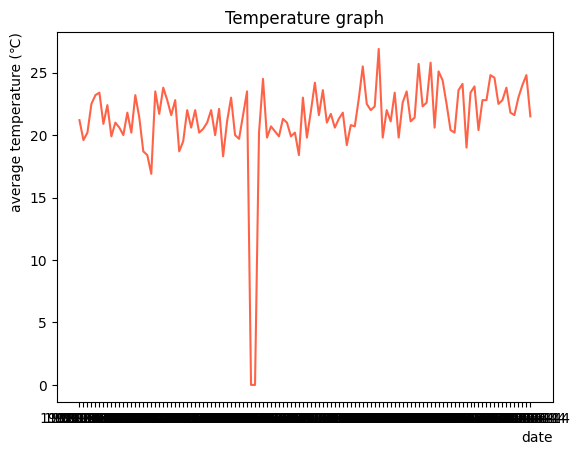

In [93]:
# 내 생일 데이터 그래프 그리기
import matplotlib.pyplot as plt
plt.title('Temperature graph')
plt.plot(birth_df['날짜'], birth_df['평균기온'], color ='tomato')
plt.xlabel('date', loc='right')
plt.ylabel('average temperature (℃)', loc='top')
plt.show()

In [ ]:
# plot 연도x  기온y 실선그래프
# 관측이래로 지구가 더워지는걸까?
# 결측치 대체 자료는 어떻게 처리하지?

> * 6월달 평균기온이 0도라고? -> 결측치를 0도로 수정했기때문.
> * y축범위 재지정.

In [96]:
birth_df['평균기온'] < 5

257      False
622      False
987      False
1352     False
1718     False
         ...  
40003    False
40368    False
40734    False
41099    False
41464    False
Name: 평균기온, Length: 114, dtype: bool

In [97]:
birth_df[birth_df['평균기온'] < 5]

,날짜,평균기온
15928,1952-06-14,0.0
16262,1953-06-14,0.0


> * 결측치를 잘못 처리했습니다. 0도로 일괄 처리한 부분이 문제로 보임 -> 전처리 실패

## 결측 데이터 재 처리

> * 평균 기온이 0인 데이터 어떻게 처리 할 것인가?
> * 결측치를 삭제하는 것으로 처리

In [98]:
#라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로딩
df = pd.read_csv('./data/ta_20220920102413utf8.csv', header=7) # 불러들일 row 위치 지정
df.head()

# 데이터 전처리 (컬럼명 수정)
df.rename(columns={df.columns[2]:'평균기온', 
                   df.columns[3]:'최저기온', 
                   df.columns[4]:'최고기온'}, inplace=True)

In [99]:
# 결측 데이터 삭제
df.dropna(inplace=True)



In [100]:
df.isnull().sum()

날짜      0
지점      0
평균기온    0
최저기온    0
최고기온    0
dtype: int64

Text(0, 1, 'average temperature (℃)')

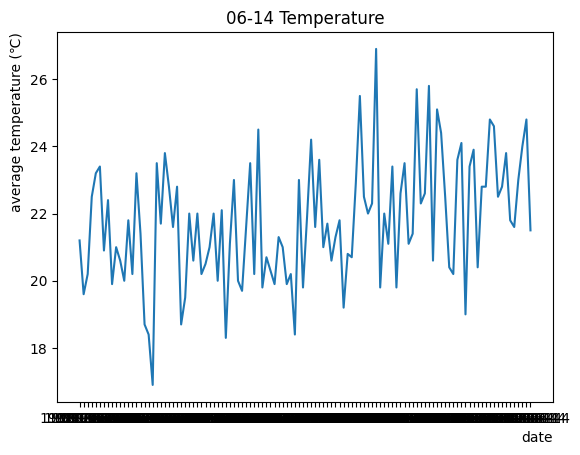

In [102]:
# 내 생일이면서, 1980년 이후의 데이터만 추출
birth_df=df[df['날짜'].str.contains('06-14')]
birth_df = birth_df[['날짜', '평균기온']]

plt.plot(birth_df['날짜'],birth_df['평균기온'])
plt.title('06-14 Temperature')
plt.xlabel('date', loc='right')
plt.ylabel('average temperature (℃)', loc='top')

## 내가 태어난 이 후의 데이터만 추출해서 살펴보기

In [119]:
df['날짜'] >= '1980-06-14'

0        False
1        False
2        False
3        False
4        False
         ...  
41557     True
41558     True
41559     True
41560     True
41561     True
Name: 날짜, Length: 40802, dtype: bool

In [114]:
# 내 생일이면서(06-14), 1980년 이후의 데이터만 추출
birth_df80=df[df['날짜'].str.contains('06-14')]
birth_df80[(birth_df80['날짜']>='1980-06-14')]
birth_df80.head()

,날짜,지점,평균기온,최저기온,최고기온
257,1908-06-14,108,21.2,17.0,27.6
622,1909-06-14,108,19.6,15.8,26.0
987,1910-06-14,108,20.2,14.9,26.1
1352,1911-06-14,108,22.5,14.4,29.3
1718,1912-06-14,108,23.2,17.3,29.0


In [116]:
# 필요한 컬럼만 추출
birth_df80 = birth_df80[['날짜', '평균기온']]
birth_df80.head()

,날짜,평균기온
257,1908-06-14,21.2
622,1909-06-14,19.6
987,1910-06-14,20.2
1352,1911-06-14,22.5
1718,1912-06-14,23.2


In [123]:
# 내 생일이면서(06-14), 1980년 이후의 데이터만 추출 (강사님 방식)
birth_df = df[ (df['날짜'].str.contains('06-14')) & (df['날짜'] >= '1980-06-14')]
birth_df.head()

,날짜,지점,평균기온,최저기온,최고기온
26124,1980-06-14,108,25.5,19.1,31.6
26489,1981-06-14,108,22.5,16.9,27.8
26854,1982-06-14,108,22.0,16.7,27.6
27219,1983-06-14,108,22.3,17.3,29.6
27585,1984-06-14,108,26.9,21.1,31.9


In [126]:
# 필요한 컬럼만 추출
birth_df = birth_df[['날짜', '평균기온']]
birth_df.tail()

,날짜,평균기온
40003,2018-06-14,21.6
40368,2019-06-14,23.0
40734,2020-06-14,24.0
41099,2021-06-14,24.8
41464,2022-06-14,21.5


Text(0, 1, 'average temperature (℃)')

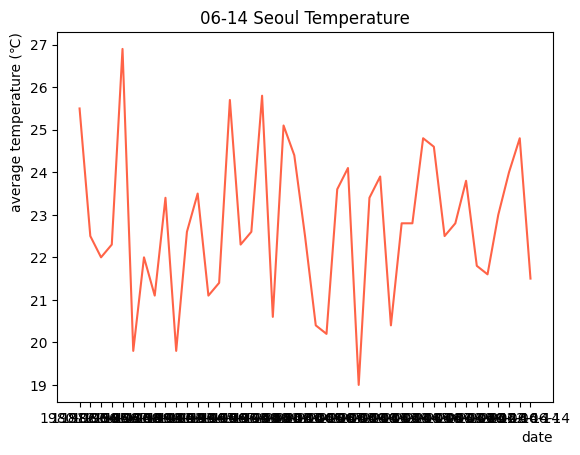

In [129]:
# 내 생일 데이터 그래프 그리기
plt.plot(birth_df['날짜'],birth_df['평균기온'], color='tomato')
plt.title('06-14 Seoul Temperature')
plt.xlabel('date', loc='right')
plt.ylabel('average temperature (℃)', loc='top')

TypeError: xticks(): Parameter 'labels' can't be set without setting 'ticks'

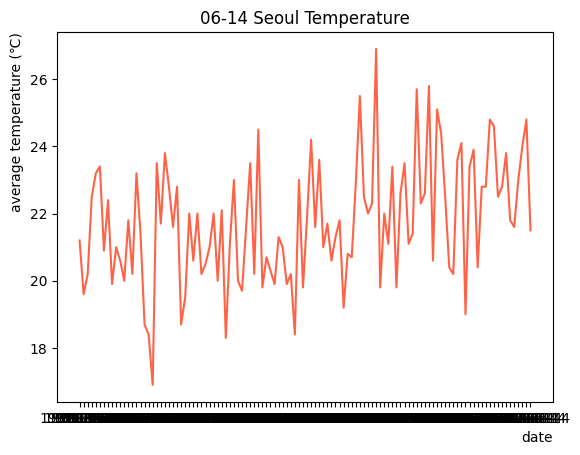

In [127]:
plt.plot(birth_df80['날짜'],birth_df80['평균기온'], color='tomato')
plt.title('06-14 Seoul Temperature')
plt.xlabel('date', loc='right')
plt.ylabel('average temperature (℃)', loc='top')
# plt.xticks([1988,2022,1])
plt.xticks(labels=[np.arange(1980, 2022)])

## 내가 태어난 날 -> 날짜 형식으로 변환하고 데이터 추출하고 보기

### 날짜 컬럼 Dtype 확인

In [130]:
# 날짜 컬럼 타입 확인
df.info()
# 날짜  Dtype  :  object 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40802 entries, 0 to 41561
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      40802 non-null  object 
 1   지점      40802 non-null  int64  
 2   평균기온    40802 non-null  float64
 3   최저기온    40802 non-null  float64
 4   최고기온    40802 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.9+ MB


### object -> datetime64[ns] 형변환

In [132]:
# 날짜 데이터 Str => date 형으로 변환
df['날짜'].astype('datetime') # astype(): pandas 형변환
# TypeError: data type 'datetime' not understood

TypeError: data type 'datetime' not understood

In [134]:
# 날짜 데이터 Str => date 형으로 변환
df['날짜'] = df['날짜'].astype('datetime64') # astype(): pandas 형변환
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40802 entries, 0 to 41561
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      40802 non-null  datetime64[ns]
 1   지점      40802 non-null  int64         
 2   평균기온    40802 non-null  float64       
 3   최저기온    40802 non-null  float64       
 4   최고기온    40802 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 1.9 MB


In [135]:
df.head()

,날짜,지점,평균기온,최저기온,최고기온
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


In [136]:
df['날짜'].dt.year # datetime64로 형변환 후 년도만 추출

0        1907
1        1907
2        1907
3        1907
4        1907
         ... 
41557    2022
41558    2022
41559    2022
41560    2022
41561    2022
Name: 날짜, Length: 40802, dtype: int64

In [137]:
df['날짜'].dt.month

0        10
1        10
2        10
3        10
4        10
         ..
41557     9
41558     9
41559     9
41560     9
41561     9
Name: 날짜, Length: 40802, dtype: int64

In [138]:
df['날짜'].dt.day

0         1
1         2
2         3
3         4
4         5
         ..
41557    15
41558    16
41559    17
41560    18
41561    19
Name: 날짜, Length: 40802, dtype: int64

In [139]:
df.head()

,날짜,지점,평균기온,최저기온,최고기온
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


In [140]:
# 데이트타임이라면 일반적으로 년 월 일 컬럼을 따로 생성함
df['년']= df['날짜'].dt.year
df['월']= df['날짜'].dt.month
df['일']= df['날짜'].dt.day
df.head()

,날짜,지점,평균기온,최저기온,최고기온,년,월,일
0,1907-10-01,108,13.5,7.9,20.7,1907,10,1
1,1907-10-02,108,16.2,7.9,22.0,1907,10,2
2,1907-10-03,108,16.2,13.1,21.3,1907,10,3
3,1907-10-04,108,16.5,11.2,22.0,1907,10,4
4,1907-10-05,108,17.6,10.9,25.4,1907,10,5


In [143]:
df['일']

0         1
1         2
2         3
3         4
4         5
         ..
41557    15
41558    16
41559    17
41560    18
41561    19
Name: 일, Length: 40802, dtype: int64

### 내 생일이면서 1980년 이후의 데이터만 추출

In [152]:
birth_df[birth_df['날짜'] >= '1980-01-01'] # 1980년 이후의 데이터 (데이트타임도 적용됨)
birth_df = df[(df['월'] == 6) & (df['일'] ==14)]
birth_df[birth_df['날짜'] >= '1980-01-01']

KeyError: '날짜'

In [153]:
df['년'] >= 1980

0        False
1        False
2        False
3        False
4        False
         ...  
41557     True
41558     True
41559     True
41560     True
41561     True
Name: 년, Length: 40802, dtype: bool

In [154]:
(df['년'] >= 1980) & (df['월'] == 6) & (df['일'] ==14)

0        False
1        False
2        False
3        False
4        False
         ...  
41557    False
41558    False
41559    False
41560    False
41561    False
Length: 40802, dtype: bool

In [148]:
# 내 생일이면서, 1980년 이후의 데이터만 추출
# birth_df = df[ (df['날짜'].str.contains('06-14')) & (df['날짜'] >= '1980-06-14')]
birth_df = df[(df['년'] >= 1980) & (df['월'] == 6) & (df['일'] ==14)]
birth_df.head()

,날짜,지점,평균기온,최저기온,최고기온,년,월,일
26124,1980-06-14,108,25.5,19.1,31.6,1980,6,14
26489,1981-06-14,108,22.5,16.9,27.8,1981,6,14
26854,1982-06-14,108,22.0,16.7,27.6,1982,6,14
27219,1983-06-14,108,22.3,17.3,29.6,1983,6,14
27585,1984-06-14,108,26.9,21.1,31.9,1984,6,14


In [150]:
# 필요한 컬럼만 추출
birth_df = birth_df[['년', '평균기온']]
birth_df.head()

,년,평균기온
26124,1980,25.5
26489,1981,22.5
26854,1982,22.0
27219,1983,22.3
27585,1984,26.9


## 그래프 그리기

In [ ]:
%pip show metplotlib

In [ ]:
!pip install -U metplotlib # 최신버전으로 업데이트되어 설치됨

Text(0, 1, 'average temperature (℃)')

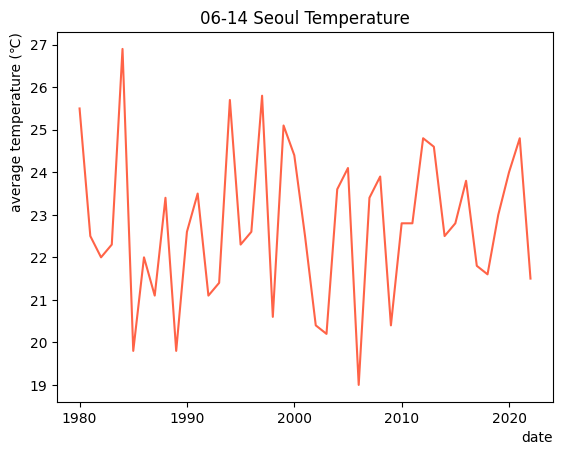

In [151]:
# 내 생일 데이터 그래프 그리기
plt.plot(birth_df['년'],birth_df['평균기온'], color='tomato')
plt.title('06-14 Seoul Temperature')
plt.xlabel('date', loc='right')
plt.ylabel('average temperature (℃)', loc='top')

In [ ]:
# X축에 날짜가 나오도록해서 다시 출력


# 매년 크리스마스의 최고 기온과 최저 기온의 추이를 그려보자. 

In [203]:
#라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로딩
df = pd.read_csv('./data/ta_20220920102413utf8.csv', header=7) # 불러들일 row 위치 지정
df.head()

# 데이터 전처리 (컬럼명 수정)
df.rename(columns={df.columns[2]:'평균기온', 
                   df.columns[3]:'최저기온', 
                   df.columns[4]:'최고기온'}, inplace=True)
# 결측 데이터 삭제
df.dropna(inplace=True)


In [208]:
df['날짜'] = df['날짜'].astype('datetime64')

In [209]:
df['년']= df['날짜'].dt.year
df['월']= df['날짜'].dt.month
df['일']= df['날짜'].dt.day

In [213]:
# 크리스마스(12-25)의 최고 최저 데이터만 추출
christmas_df = df[(df['월'] == 12) & (df['일'] ==25)]
christmas_df.head()

,날짜,지점,평균기온,최저기온,최고기온,년,월,일
85,1907-12-25,108,3.5,1.1,6.8,1907,12,25
451,1908-12-25,108,-0.3,-6.6,6.3,1908,12,25
816,1909-12-25,108,-9.9,-12.5,-6.0,1909,12,25
1181,1910-12-25,108,-0.5,-4.1,0.6,1910,12,25
1546,1911-12-25,108,-1.8,-5.4,0.7,1911,12,25


In [215]:
# 필요한 컬럼만 추출
christmas_df = christmas_df[['년', '최고기온', '최저기온']]
christmas_df.head()

,년,최고기온,최저기온
85,1907,6.8,1.1
451,1908,6.3,-6.6
816,1909,-6.0,-12.5
1181,1910,0.6,-4.1
1546,1911,0.7,-5.4


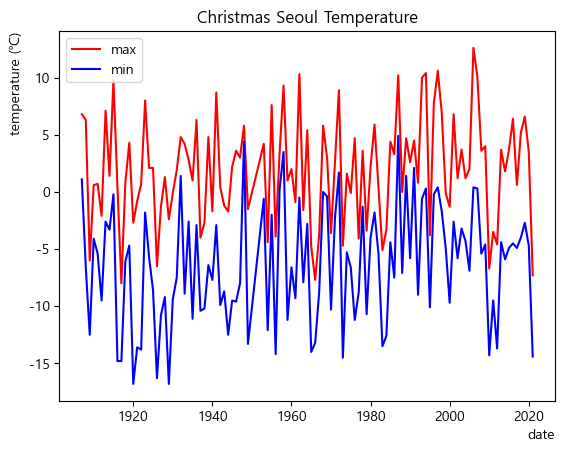

In [227]:
# 크리스마스 데이터 그래프 그리기
plt.rc('font',family='Malgun Gothic')
plt.title('Christmas Seoul Temperature')
plt.plot(christmas_df['년'],christmas_df['최고기온'], color='r', label='max' )
plt.plot(christmas_df['년'],christmas_df['최저기온'], color='b', label='min' )
plt.xlabel('date', loc='right')
plt.ylabel('temperature (℃)', loc='top')
plt.legend()

# 같은 데이타, 다른 그래프, 새로운 분석
* 서울 최고 기온 데이터 전체를 나타낸 lineplot을 보고 어떤 정보를 얻었나요?

##  line:서울 최고 기온 그래프

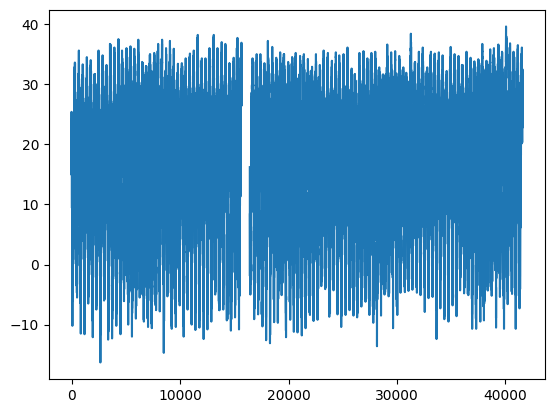

In [155]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/ta_20220920102413utf8.csv',header=7)
df.rename(columns={
    df.columns[2]: '평균기온',
    df.columns[3]: '최저기온',
    df.columns[4]: '최고기온'
},inplace=True)

plt.plot(df['최고기온'])
plt.show()

> * 최고 기온 데이터 전체를 그래프로 나타냈는데, 결측치 존재 말고는 특별한 정보를 얻을 수 없습니다. 
> * 다른 관점으로 데이터를 바라보기 위해서
> * 다른 종류의 시각화를 시도해 봅시다. 

In [ ]:
# 비어있는 결측치의 존재. 
# 그래프의 방향성 별로 눈에 띄지않음 (우상향 등)

## hist:기온 데이터를 히스토그램으로 표현하기

* 특정구간의 자료의 수를 표현할때

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./data/ta_20220920102413utf8.csv',header=7)
df.rename(columns={
    df.columns[2]: '평균기온',
    df.columns[3]: '최저기온',
    df.columns[4]: '최고기온'
},inplace=True)



(array([  35.,  596., 2812., 5465., 5275., 4915., 6248., 9004., 5915.,
         538.]),
 array([-16.3 , -10.71,  -5.12,   0.47,   6.06,  11.65,  17.24,  22.83,
         28.42,  34.01,  39.6 ]),
 <BarContainer object of 10 artists>)

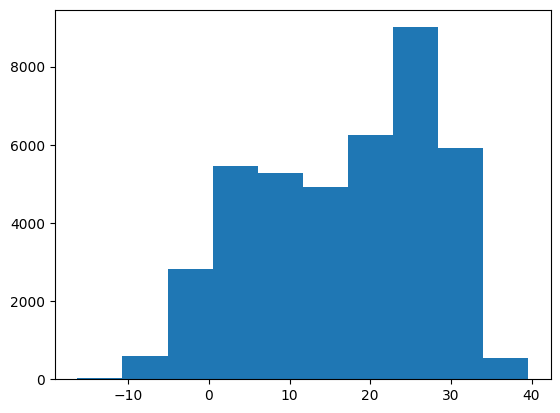

In [160]:
plt.hist(df['최고기온']) # hist() 컬럼 한 개 지정 : 특정구간을 카운팅

<AxesSubplot: >

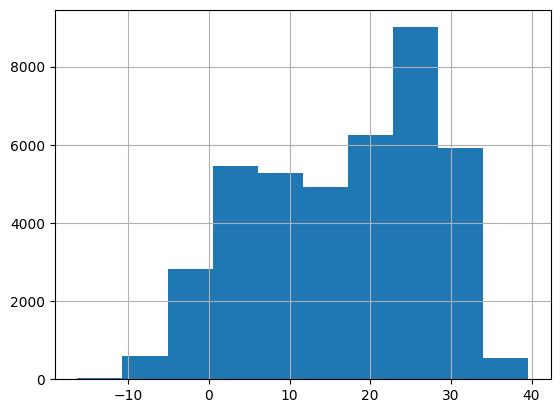

In [161]:
# pandas 내부의 매플릿립 라이브러리와 연동
# 현재 '최고기온'에만 관심있는 상황
df['최고기온'].hist()
# 구간이 어떻게 나뉘었는지 해석오차가 생길 여지 있음 -> 구간을 잘게 나눔

<AxesSubplot: >

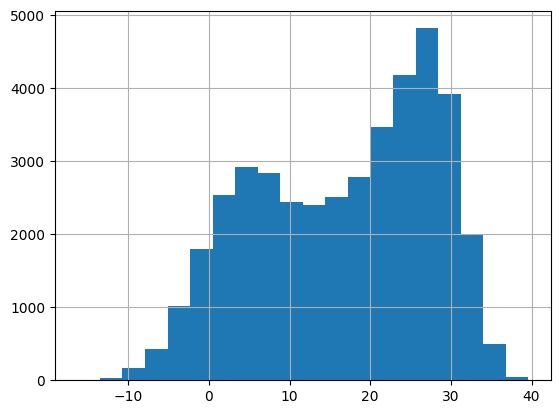

In [162]:
df['최고기온'].hist(bins=20) # 앞서는 10구간. 아래는 20구간으로 나눠서 시각화

<AxesSubplot: >

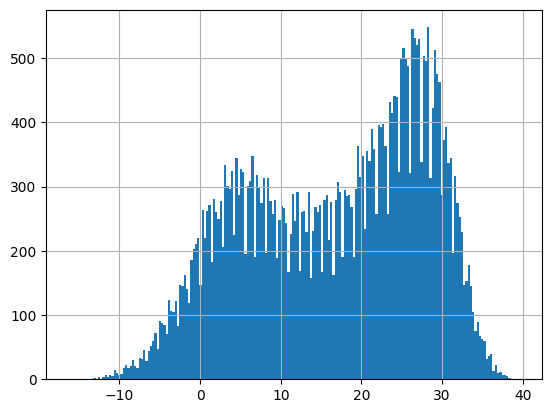

In [163]:
df['최고기온'].hist(bins=200)

<AxesSubplot: >

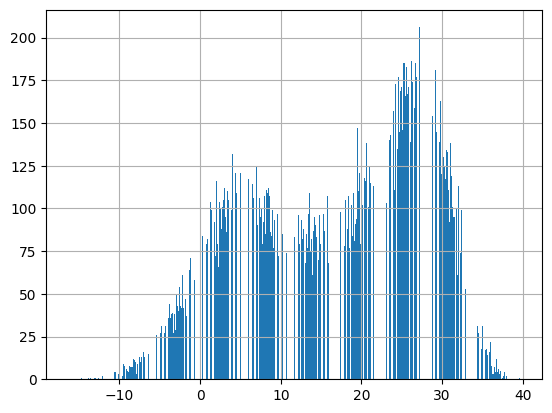

In [164]:
df['최고기온'].hist(bins=1000)

In [ ]:
# 구간을 너무 많이 하는 것 보다는 차라리 라인그래프가 더 적절

<AxesSubplot: >

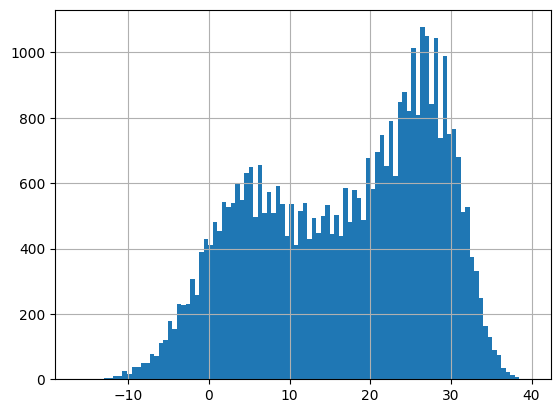

In [165]:
df['최고기온'].hist(bins=100)

> * 낙타 등 처럼 보입니다.
> * 겨울과 여름 계절의 패턴이 이렇게 나타난걸까요?
> * 한 계절만 추출해봐야지~

<AxesSubplot: >

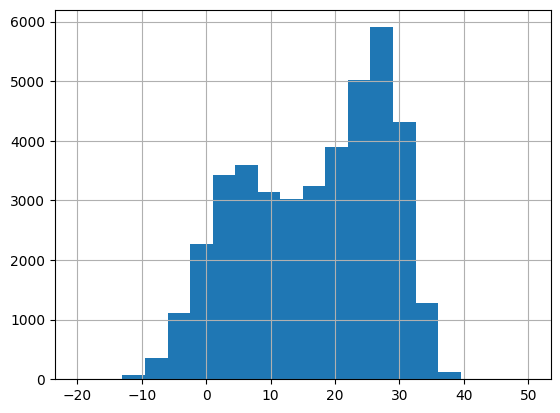

In [193]:
df['최고기온'].hist(bins=20, range=(-20,50)) # 특정 범위 지정

> * 히스토그램 : 구간별 빈도 차트

## hist:겨울과 여름 계절의 패턴인가? 그럼 8월만 데이터를 뽑아보자.
* 역대 8월의 최고 온도는?
* 최고 기온의 분포(최저 ~ 최고)는?

In [166]:
df.head()

,날짜,지점,평균기온,최저기온,최고기온
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


In [167]:
df.isnull().sum()

날짜        0
지점        0
평균기온    756
최저기온    759
최고기온    759
dtype: int64

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40802 entries, 0 to 41561
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      40802 non-null  object 
 1   지점      40802 non-null  int64  
 2   평균기온    40802 non-null  float64
 3   최저기온    40802 non-null  float64
 4   최고기온    40802 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.9+ MB


In [172]:
# 날짜 타입으로 변환
df['날짜'] = df['날짜'].astype('datetime64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40802 entries, 0 to 41561
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      40802 non-null  datetime64[ns]
 1   지점      40802 non-null  int64         
 2   평균기온    40802 non-null  float64       
 3   최저기온    40802 non-null  float64       
 4   최고기온    40802 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 1.9 MB


In [173]:
# 8월만 데이터 추출
df['월']= df['날짜'].dt.month
df.head()

,날짜,지점,평균기온,최저기온,최고기온,월
0,1907-10-01,108,13.5,7.9,20.7,10
1,1907-10-02,108,16.2,7.9,22.0,10
2,1907-10-03,108,16.2,13.1,21.3,10
3,1907-10-04,108,16.5,11.2,22.0,10
4,1907-10-05,108,17.6,10.9,25.4,10


In [175]:
aug_df = df[df['월'] == 8 ]
aug_df.head()

,날짜,지점,평균기온,최저기온,최고기온,월
305,1908-08-01,108,26.2,24.4,29.6,8
306,1908-08-02,108,26.4,23.3,30.7,8
307,1908-08-03,108,26.9,24.2,32.0,8
308,1908-08-04,108,26.3,22.6,31.5,8
309,1908-08-05,108,27.3,23.6,32.4,8


In [176]:
# 강사님 방식

# 결측치 삭제
df.dropna(inplace=True)

# 날짜 타입으로 변환
df['날짜'] = df['날짜'].astype('datetime64')

In [178]:
# 8월만 데이터 추출 # 강사님 방식
aug_df= df[df['날짜'].dt.month == 8 ]
aug_df.head()

,날짜,지점,평균기온,최저기온,최고기온,월
305,1908-08-01,108,26.2,24.4,29.6,8
306,1908-08-02,108,26.4,23.3,30.7,8
307,1908-08-03,108,26.9,24.2,32.0,8
308,1908-08-04,108,26.3,22.6,31.5,8
309,1908-08-05,108,27.3,23.6,32.4,8


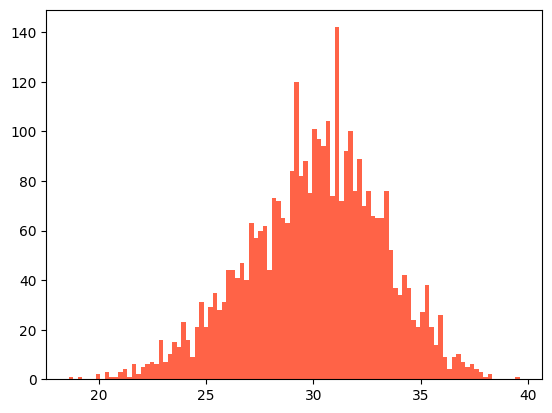

In [181]:
# hist(데이터,몇개구간,색깔)
plt.hist(aug_df['최고기온'], bins=100, color='tomato')
plt.show()

## hist:1월과 8월의 데이터를 히스토그램으로 시각화하기


In [182]:

# 8월 데이터만 추출
aug_df=df[df['날짜'].dt.month == 8 ]

# 1월 데이터만 추출
jan_df=df[df['날짜'].dt.month == 1 ]

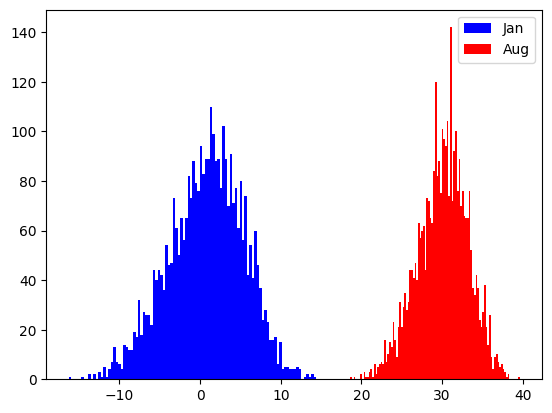

In [187]:
plt.hist(jan_df['최고기온'], bins=100, color='b',  label='Jan')
plt.hist(aug_df['최고기온'], bins=100, color='r', label='Aug')
plt.legend() # 범례 표시
plt.show()

> * 같은 데이터에서 어떤 내용을 추출하여, 어떤 방법으로 시각화하는냐에 따라 새로운 정보를 발견할 수 있습니다. 
> * 1,8월 이외에 궁금한 달이 있다면 도전!

>*히스토그램 (Histogram)은 도수분포표를 그래프로 나타낸 것으로서, 가로축은 계급, 세로축은 도수 (횟수나 개수 등)를 나타냅니다.

## box:기온 데이터 대략적인 통계정보 확인하기

In [189]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/ta_20220920102413utf8.csv',header=7)
df.rename(columns={
    df.columns[2]: '평균기온',
    df.columns[3]: '최저기온',
    df.columns[4]: '최고기온'
},inplace=True)


# 결측 데이터 삭제
df.dropna(inplace=True)


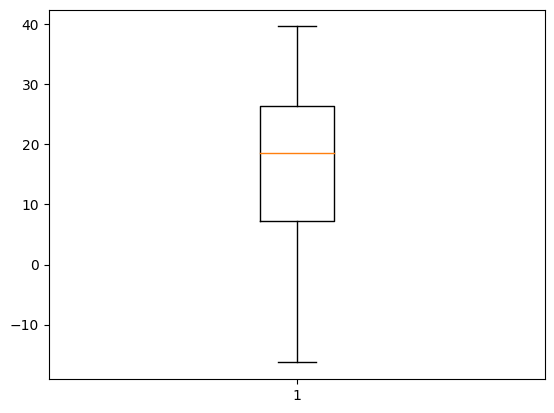

In [190]:
plt.boxplot(df['최고기온'])
plt.show()

In [191]:
df['최고기온'].describe()

count    40802.000000
mean        16.784462
std         10.980112
min        -16.300000
25%          7.300000
50%         18.600000
75%         26.300000
max         39.600000
Name: 최고기온, dtype: float64

In [ ]:
# 최소 최대 중간값 사분위값(25,75) => 전체값에서 분포가 직관적으로 보이진 않음
# 박스플롯은 양끝이 최대 최소, 박스는 25~75이고, 주황선은 50이다.


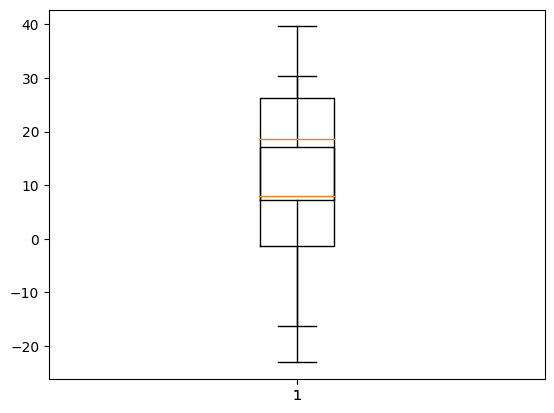

In [192]:
plt.boxplot(df['최고기온'])
plt.boxplot(df['최저기온'])
plt.show()

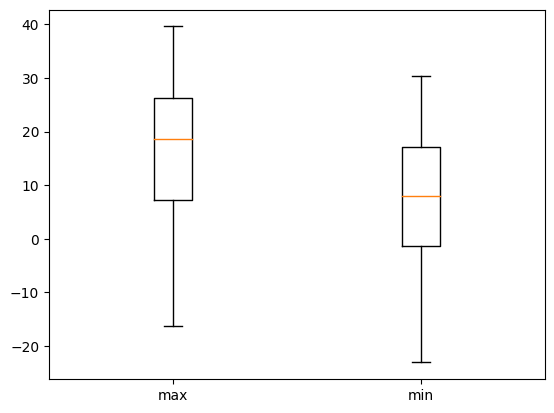

In [194]:
plt.boxplot([df['최고기온'], df['최저기온']], labels=['max', 'min'] )
# plt.boxplot([df['최고기온'], df['최저기온']], labels=['최고', '최저'] )
# 한글 인식안되서 네모모양
plt.show()

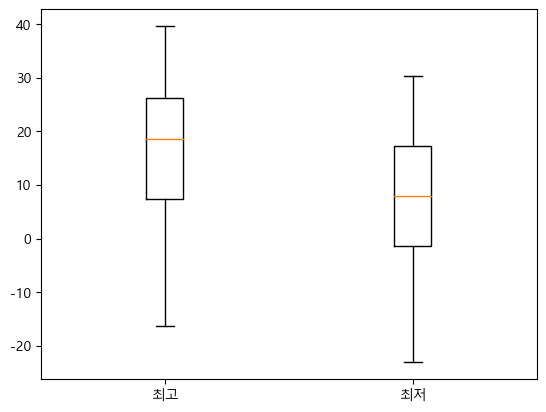

In [195]:
#한글 사용 시 설정
plt.rc('font',family='Malgun Gothic')      #맑은 고딕을 기본 글꼴로 설정, macOS일 경우,'AppleGothic'
#plt.rc('font', family='AppleGothic') #맥
plt.rcParams['axes.unicode_minus']=False  #마이너스 기호 깨짐 방지

plt.boxplot([df['최고기온'], df['최저기온']], labels=['최고', '최저'] )
plt.show()

## 월별 기온 데이터

1. 데이터를 월별로 조회하고, 결과를 리스트에 담는다.
2. 월별 데이터를 box plot으로 그래프 그린다. 

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./data/ta_20220920102413utf8.csv',header=7)
df.rename(columns={
    df.columns[2]: '평균기온',
    df.columns[3]: '최저기온',
    df.columns[4]: '최고기온'
},inplace=True)

# 결측 데이터 삭제
df.dropna(inplace=True)
# 날짜 데이터 Str => date 형으로 변환
df['날짜'] = df['날짜'].astype('datetime64')

In [230]:
# 변수명
vars=[]
for i in range(1,13):
    var=f'df_month{i}'
    # print(var)
    vars.append(var)

In [232]:
vars

['df_month1',
 'df_month2',
 'df_month3',
 'df_month4',
 'df_month5',
 'df_month6',
 'df_month7',
 'df_month8',
 'df_month9',
 'df_month10',
 'df_month11',
 'df_month12']

In [234]:
# 월별 데이터 추출
# month01_df=df[df['날짜'].dt.month == 1 ]
for i in range(0,12):
    
    vars[i] = df[df['날짜'].dt.month == i+1 ]
    print(vars[i])


              날짜   지점  평균기온  최저기온  최고기온     년  월   일
92    1908-01-01  108  -5.9  -9.1  -1.3  1908  1   1
93    1908-01-02  108  -7.7 -13.9  -3.0  1908  1   2
94    1908-01-03  108  -6.2 -10.8  -2.9  1908  1   3
95    1908-01-04  108  -7.5 -12.8  -1.7  1908  1   4
96    1908-01-05  108  -4.8 -11.3  -0.1  1908  1   5
...          ...  ...   ...   ...   ...   ... ..  ..
41326 2022-01-27  108  -1.1  -4.6   4.0  2022  1  27
41327 2022-01-28  108  -2.7  -5.9   2.1  2022  1  28
41328 2022-01-29  108  -3.6  -7.2   0.9  2022  1  29
41329 2022-01-30  108  -2.8  -8.0   2.4  2022  1  30
41330 2022-01-31  108  -0.7  -6.8   4.8  2022  1  31

[3472 rows x 8 columns]
              날짜   지점  평균기온  최저기온  최고기온     년  월   일
123   1908-02-01  108  -2.2  -6.4   1.6  1908  2   1
124   1908-02-02  108  -3.1  -7.5  -0.2  1908  2   2
125   1908-02-03  108  -8.0 -10.8  -5.4  1908  2   3
126   1908-02-04  108  -7.0 -10.3  -4.1  1908  2   4
127   1908-02-05  108  -8.5 -11.6  -5.5  1908  2   5
...          ...  ...

In [235]:
vars[1]

,날짜,지점,평균기온,최저기온,최고기온,년,월,일
123,1908-02-01,108,-2.2,-6.4,1.6,1908,2,1
124,1908-02-02,108,-3.1,-7.5,-0.2,1908,2,2
125,1908-02-03,108,-8.0,-10.8,-5.4,1908,2,3
126,1908-02-04,108,-7.0,-10.3,-4.1,1908,2,4
127,1908-02-05,108,-8.5,-11.6,-5.5,1908,2,5
...,...,...,...,...,...,...,...,...
41354,2022-02-24,108,-2.4,-8.5,3.7,2022,2,24
41355,2022-02-25,108,3.0,-3.6,8.4,2022,2,25
41356,2022-02-26,108,5.4,1.0,9.3,2022,2,26
41357,2022-02-27,108,3.7,-1.6,9.1,2022,2,27


In [ ]:
for i in range(0,12):
    
    vars[i] = df[df['날짜'].dt.month == i+1 ]

ValueError: Dimensions of labels and X must be compatible

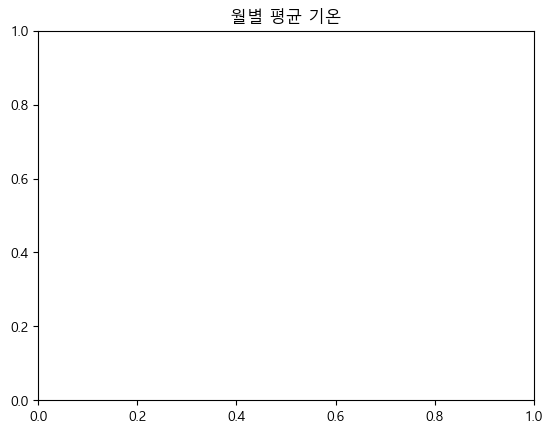

In [239]:
# 박스플롯 형태 : 월별로 1~12 범위. 박스가 따로 따로 그려지도록. 리스트에 담아서 박스플롯
plt.title('월별 평균 기온')
plt.rc('font',family='Malgun Gothic')      
plt.rcParams['axes.unicode_minus']=False  
for i in range(0,12):
    plt.boxplot(vars[i], labels=[i+1] )
plt.xlabel('월', loc='right')
plt.ylabel('평균 기온(℃)', loc='top')
plt.show()

In [218]:
# 월별 데이터 추출
month01_df=df[df['날짜'].dt.month == 1 ]
month02_df=df[df['날짜'].dt.month == 2 ]
month03_df=df[df['날짜'].dt.month == 3 ]
month04_df=df[df['날짜'].dt.month == 4 ]
month05_df=df[df['날짜'].dt.month == 5 ]
month06_df=df[df['날짜'].dt.month == 6 ]
month07_df=df[df['날짜'].dt.month == 7 ]
month08_df=df[df['날짜'].dt.month == 8 ]
month09_df=df[df['날짜'].dt.month == 9 ]
month10_df=df[df['날짜'].dt.month == 10 ]
month11_df=df[df['날짜'].dt.month == 11 ]
month12_df=df[df['날짜'].dt.month == 12 ]

In [236]:
month02_df

,날짜,지점,평균기온,최저기온,최고기온,년,월,일
123,1908-02-01,108,-2.2,-6.4,1.6,1908,2,1
124,1908-02-02,108,-3.1,-7.5,-0.2,1908,2,2
125,1908-02-03,108,-8.0,-10.8,-5.4,1908,2,3
126,1908-02-04,108,-7.0,-10.3,-4.1,1908,2,4
127,1908-02-05,108,-8.5,-11.6,-5.5,1908,2,5
...,...,...,...,...,...,...,...,...
41354,2022-02-24,108,-2.4,-8.5,3.7,2022,2,24
41355,2022-02-25,108,3.0,-3.6,8.4,2022,2,25
41356,2022-02-26,108,5.4,1.0,9.3,2022,2,26
41357,2022-02-27,108,3.7,-1.6,9.1,2022,2,27


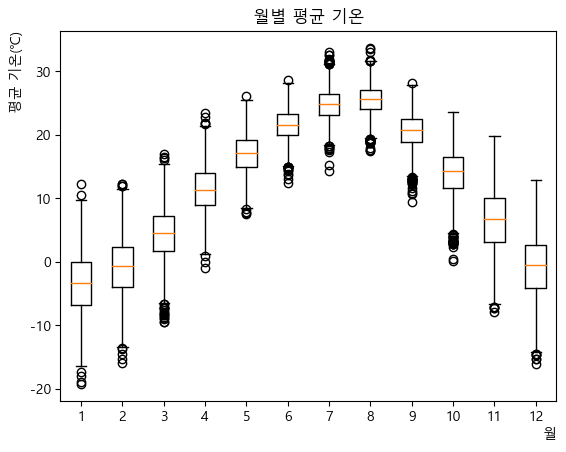

In [223]:
# 박스플롯 형태 : 월별로 1~12 범위. 박스가 따로 따로 그려지도록. 리스트에 담아서 박스플롯
plt.title('월별 평균 기온')
plt.rc('font',family='Malgun Gothic')      
plt.rcParams['axes.unicode_minus']=False  
plt.boxplot([month01_df['평균기온'], month02_df['평균기온'],month03_df['평균기온'],month04_df['평균기온'],month05_df['평균기온'],month06_df['평균기온'],month07_df['평균기온'],month08_df['평균기온'],month09_df['평균기온'],month10_df['평균기온'],month11_df['평균기온'],month12_df['평균기온']], labels=['1','2','3','4','5','6','7','8','9','10','11','12'] )
plt.xlabel('월', loc='right')
plt.ylabel('평균 기온(℃)', loc='top')
plt.show()

# 반복문으로 포맷을 활용해보려고 접근했는데, 잘 풀리지 않았어요ㅜㅜ 어떻게 풀어가야할까요?